# Image Recognition With Neural Networks In Keras

------------

## Contents

------------

__[1. Introduction](#Introduction)__

__[2. Artificial Neural Networks](#second-bullet)__

__[3. The MNST Dataset](#third-bullet)__

__[4. Neural Networks In Keras](#fourth-bullet)__

__[5. Conclusions](#fifth-bullet)__


## Introduction <a class="anchor" id="Introduction"></a>

----------

Artifical intelligence, neural networks and deep learning (which are often used interchangeably) are gaining more and more noterarity everyday.  This is not only due to their amazing performance, but also because of their various applications.  From being able to detect <a href="http://www.nature.com/nature/journal/v542/n7639/full/nature21056.html?foxtrotcallback=true">skin cancer</a> to generating <a href="https://www.engadget.com/2017/04/10/neural-network-pickup-lines/">pickup lines</a>, neural networks are finding more ways to creep up into our lives.


Research in the field of (artificial) neural networks originated from pattern recognition, and one of the original models introduced was called the <a href="https://en.wikipedia.org/wiki/Perceptron">perceptron.</a>  A specific kind of Neural Network called the Multilayer Perceptron is an extension of this original work and I will use this model to do statistical pattern recognition. Specifically I'll be doing Optical Character Recogninition or ORC on the famous <a href="http://yann.lecun.com/exdb/mnist/">MNIST</a> data set and using one of the most popular deep learning libraries, <a href="keras.io">Keras</a>, to do so.


## Artificial Neural Networks <a class="anchor" id="second-bullet"></a>

In machine learning we are generally trying to find the relationship between some the **target variable** (that we are trying to predict), $y$, and the **feature variables** $\textbf{x} \in \mathbb{R}^{p+1}$.  In many machine learning models we formulate the relationship as function $y(\textbf{x}, \textbf{w})$, where the weights $\textbf{w} \in \mathbb{R}^{p+1}$ are determined by solving an optimization problem.  The form of $y(\textbf{x}, \textbf{w})$ depends on the problem. For linear regression it is,

$$ y \, = \, \textbf{w}^{T} \textbf{x} $$

Where as in logistic regression it is,

$$ y \, = \, \frac{1}{1 + \exp(-\textbf{w}^{T} \textbf{x})} $$

We can rewrite both these models as,

$$ y(\textbf{x}, \textbf{w}) \, = \, f(\textbf{w}^{T} \textbf{x}) $$

Where $f(\cdot)$ is called the ** *activation function* ** and is

- The identity operator for linear regresion

and 

- The <a href="https://en.wikipedia.org/wiki/Sigmoid_function">sigmoid</a> function for logistic regression 


We can generalize the above a little more introducing *fixed (possibly non-linear) basis functions* $\boldsymbol \phi : \mathbb{R}^{p+1} \rightarrow \mathbb{R}^{p+1} $ to transform our feature vectors:

$$ y(\textbf{x}, \textbf{w}) \, = \, f(\textbf{w}^{T} \boldsymbol \phi(\textbf{x})) $$

This is what is called a <a href="https://en.wikipedia.org/wiki/Generalized_linear_model">generalized linear model</a> and can be used to model many different phenomena. *The term linear comes from the fact besides the activation function, our model only depends linearly on the weights $\textbf{w}$.*


*Neural Networks are non-linear statitical models that allow the basis ($\boldsymbol \phi$) functions to depend on parameters along with the coefficients $(\textbf{w})$ and can be adjusted during training.*  Artificial Neural networks are are composed on neurons or units that are connected to one another and organized in layers.  Below we see a two-layer neural network, where the input is our feature data, $\textbf{x}$, and the output is the variable, $y$ that we are trying to predict:

![ANN.png](ANN.png)

Neurons have a state, generally represented by real numbers, typically between 0 and 1. Different layers may perform different kinds of transformations on their inputs or signals. These transformations can be thought of as the activation function acting on the signal.   Signals travel from the first (input), to the last (output) layer, possibly after traversing the layers multiple times.

In order to compute the prediction of a value $y \in \mathbb{R}^{K}$ from a vector $\textbf{x} \in \mathbb{R}^{p}$, 
We take a matrix $ A \in \mathbb{R}^{M \times p} $, and also bias unit, $ \textbf{c}_{1} \in \mathbb{R}^{M} $ and use them to compute the "hidden unit" (pictured in blue), with the transformation,

$$ \textbf{z} \; = \; \textbf{h}(A \, \textbf{x} + \textbf{c}_{1}) \; = \; h \left( \sum_{j} A_{i,j} \, \textbf{x}_{i} + \textbf{c}_{1,i} \right) $$

Where $h(\cdot)$ is the sigmoid function,

$$ h(a) = \frac{1}{1+ \exp{(-a)}}$$

$\textbf{h}$ is used to represent the vector resulting from taking taking the sigmoid function of the input vector component wise.  The number $M$ is the number of hidden units in the neural network.  To transform the hidden unit values to predictions of target values (or the output), we use the matrix, $ B \in \mathbb{R}^{K \times M} $ and the bias vector $ \textbf{c}_{2} \in \mathbb{R}^{K} $ to compute the prediction $\hat{y}$,


$$ \hat{y}(\textbf{x}; \, A, B, \textbf{c}_{1}, \textbf{c}_{2}) \; = \; f\left(B \, \textbf{z} + c_{2}\right) \; = \; f \left( \sum_{i} B_{i,j} \,  \textbf{z}_{j} + c_{2,i} \right)$$ 


Or,


$$ \hat{y}(\textbf{x}; \, A, B, \textbf{c}_{1}, \textbf{c}_{2}) = f\left(B \; \textbf{h}(A \, \textbf{x} + \textbf{c}_{1})  + c_{2}\right) $$ 



Where $f(\cdot)$ is the either the identiy operator in regression, the sigmoid function in binary classification or the softmax function,  

$$ f_{k}(z) = \frac{\exp(z_{k})}{\sum_{i=1}^{K} \exp(z_{k})} $$

for $K$-class classification problems.  In the case of $K$-class classification problems, we choose the class which maximizes the softmax function.

The process of computing the coefficients in $A, B, \textbf{c}_{1} \text{ and } \textbf{c}_{2}$ is known as <a href="https://en.wikipedia.org/wiki/Backpropagation">backpropegation</a>. Backpropegation is a complicated algorithm and as we'll see one of the nice thing about Keras is that all the details of the backpropegation get swept under the rug!

## The MNIST Dataset

------------

I will access the MNIST data set from the <a href="https://www.tensorflow.org/">TensorFlow</a> library.  One can acess the MNIST data from the Keras library, but I first worked with the TensorFlow version and found it more straight forward.  **Note the command below downloads the dataset, so you will need wifi in order to run it.**

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


One hot means that the if the <code>n</code>-th digit in the array is a 1 then the label for this datapoint is <code>n</code>. An example for numbers 1,...9, would be,

$$0 = [1,0,0,0,0,0,0,0,0], \text{ and } 7 = [0,0,0,0,0,0,1,0,0] $$ 

Now let's take a look at the size of our dataset:

In [3]:
print("Number of training examples = ", mnist.train.num_examples)
print("Number of testing examples = ", mnist.test.num_examples)

Number of training examples =  55000
Number of testing examples =  10000


We can create variables for our training and test data sets. The variable $X_{\text{train}}$ which contain the images for the training set and the variable $Y_{\text{train}}$ contains the actual numbers that the training set images represent. We do the same for the test sets $X_{\text{test}}$ and $Y_{\text{test}}$.

In [4]:
print("Training dataset size = ", mnist.train.images.shape)
print("Training dataset labels = ", mnist.train.labels.shape)

X_train = mnist.train.images
Y_train = mnist.train.labels

print("Test dataset size = ", mnist.test.images.shape)
print("Test dataset labels = ",mnist.test.labels.shape)

X_test  = mnist.test.images
Y_test  = mnist.test.labels

Training dataset size =  (55000, 784)
Training dataset labels =  (55000, 10)
Test dataset size =  (10000, 784)
Test dataset labels =  (10000, 10)


We see that the training set is a matrix of size 55,000 rows and 784 columns.  Each row reperesents an image in the data set, while each of columns represents a degree of freedom (grey scale of a pixel) in the image.  Let me explain what this means further. Each image of a number is $28 \times 28$ pixels. This means that each image has $28 \times 28 = 784$ degrees of freedom.  Instead of storing the images $28 \times 28$ matrices they flattened them to vectors of size $1 \times 784$.  We can view images by first converting the $1 \times 784 $ vectors to $28 \times 28$ matrices using the <a href="http://www.numpy.org/">NumPy</a> library:

In [5]:
import numpy as np
im = np.reshape(X_train[1,:], [28,28])

And then look at the sparsity pattern of the matrix:

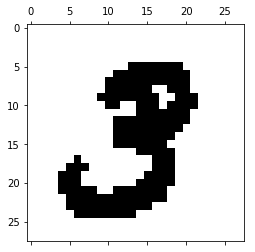

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.spy(im)

This just shows us all the entries in the matrix that are non-zero (the points which are black).  The pixels however actually have a grey scale value and by just looking at the sparsity pattern we can't see the different shadings in the pixels. 

Let's instead look at the values of the matrix entires.  These values reprsent the shading of grey for the corresponding pixel in the image.  We can do this using the <a href="https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.imshow.html">imshow</a> method from <a href="https://matplotlib.org">matplotlib</a> library using the grey shading as our color map:

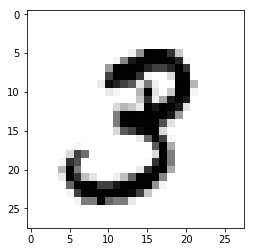

In [7]:
plt.imshow(im, cmap='Greys')

Now, let's loop through a few of these images and also look at the image labels:

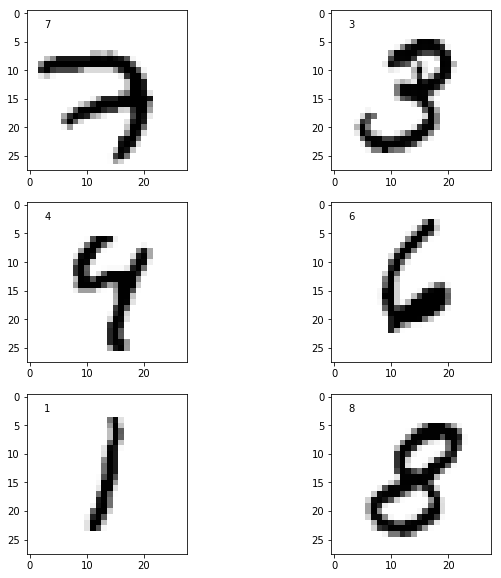

In [8]:
left= 2.5
top = 2.5

fig = plt.figure(figsize=(10,10))

for i in range(6):
    ax = fig.add_subplot(3,2,i+1)
    
    # reshape the training image from a 784 element array to a
    # 28x28 pickle matrix
    im = np.reshape(X_train[i,:], [28,28])

    # get the actual digit for the image
    label = np.argmax(Y_train[i,:])
    
    # show the image using color map grey scale
    ax.imshow(im, cmap='Greys')
    ax.text(left, top, str(label))

The label of the of the numbers image is displayed in the upper left hand corner.


Now that we have gotten an idea of the data we are working with let's jump into the machine learning!

## Neural Networks In Keras <a class="anchor" id="fourth-bullet"></a>

------------

Keras is a library which makes working with neural networks easy and allows one to use either <a href="tensorflow.org">TensorFlow</a> or <a href="http://deeplearning.net/software/theano/">Theano</a> as a backend to do computations.  In order to use TensorFlow as a backend for Keras we have to change the file in `~/.keras/keras.json`:

![./kera_json.png](./kera_json.png)

In that file we change `backend` field to `tensorflow` instead of `theano`.  

We'll be focusing on just using multilayer perceptrons in this post and in order to build them we must first import Keras <a href="https://keras.io/getting-started/sequential-model-guide/">Sequential model</a>.  Using sequential models means that our neural network will just be a stack of layers of neurons or units:

In [8]:
from keras.models import Sequential
model = Sequential()

Using TensorFlow backend.


For now we set our model to have 10 hidden units and 10 categories of output for numbers 1 - 9:

In [9]:
M = 10 # hidden units
K = 10 # outputs

Next, we import the `Dense` module from `keras.layers`.  Dense models have each layer connected to each other layer in a feed-forward architecture.  It also signifies that the underlying graph will be dense and can be stored as a matrix.

In [10]:
from keras.layers import Dense

The first layer in our model will have 784 inputs and $M$ outputs, that is our $A$ matrix will be $M \times 784$. We create this matrix with the following command:

In [11]:
model.add(Dense(M, input_dim=784, activation='sigmoid'))

Notice that we also say that our activation function ( $h$ ) will be a sigmoid function.

We then add on another dense layer that has $K$ outputs:

In [12]:
model.add(Dense(K, activation='softmax'))

Notice how after the first layer we do not have to specify the input dimension, Keras will automatically figure out that the `input_dim` is $M$. This last layer represents the $B$ matrix and will be $K \times M$.  Since this is top layer we use the softmax as our activation function ( $f$ ).

Finally, note that we do not add any biases $(\textbf{c}_{1}, \textbf{c}_{2})$ into our model.

In Keras, we need to configure the learning process before we can train our model. Configuring the learning process is done via the `compile` method. The compile method receives three arguments:

- the loss function
- the optimizer to minimize the loss function
- the metric to evaluate the performance of your predictions

Since we are dealing with a multiclass classification problem we use the the `categorical_crossentropy` loss function.  We will use the default `adam` optimizer and choose `accuracy` as our metric:

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

After we compile our model we can then fit the model to the training data.  The `fit` function recieves the input data and the labels/target values.  We must also specify the `batch_size` which is the number of samples used during a gradient descent update of the coefficients as well as the number of `epochs`:

In [14]:
# Fit the model
model.fit(X_train, Y_train, epochs=20, batch_size=128, )

Epoch 1/20
55000/55000 [==============================] - 2s - loss: 1.5593 - acc: 0.6432     
Epoch 2/20
55000/55000 [==============================] - 1s - loss: 0.8837 - acc: 0.8342     
Epoch 3/20
55000/55000 [==============================] - 1s - loss: 0.6385 - acc: 0.8655     
Epoch 4/20
55000/55000 [==============================] - 1s - loss: 0.5194 - acc: 0.8804     
Epoch 5/20
55000/55000 [==============================] - 1s - loss: 0.4484 - acc: 0.8925     
Epoch 6/20
55000/55000 [==============================] - 1s - loss: 0.4018 - acc: 0.8994     
Epoch 7/20
55000/55000 [==============================] - 1s - loss: 0.3684 - acc: 0.9048     
Epoch 8/20
55000/55000 [==============================] - 1s - loss: 0.3435 - acc: 0.9095     
Epoch 9/20
55000/55000 [==============================] - 1s - loss: 0.3242 - acc: 0.9130     
Epoch 10/20
55000/55000 [==============================] - 1s - loss: 0.3087 - acc: 0.9157     
Epoch 11/20
55000/55000 [========================

We can then evaluate the accuracy of our model on the test set data using the `evaluate` function:

In [18]:
scores = model.evaluate(X_test, Y_test)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

 8960/10000 [=========================>....] - ETA: 0sTest loss: 0.253042970234
Test accuracy: 0.9238


Our model achieves $92.38\%$ accuracy, which is not much better than using multinomial logistic regression that was in the TensorFlow tutorial <a href="https://www.tensorflow.org/get_started/mnist/beginners">here</a>. 


One way to improve the accuracy is to increase the number of hidden units.  Increasing the number of hidden units will increase the complexity of our model and allow it to pick up more subtle characteristics of the input variables. 

Instead of going through the same process as above for a different value of $M$ we will write out a function to take in a vaiable, $M$ (or number of hidden units) and returns the training and test accuracy of that model:

In [21]:
def evaluate_model(M, K, X_train, Y_train, X_test, Y_test):
    """
    Trains a 2-layer MLP and returns the test accuracy.
    
    :paramaters:
    ------------
    M (int) : Number of Neurons in the hidden layer.
    K (int) : Number of outputs.
    X_train (NumPy array) : Training data
    Y_train (NumPy array) : Training labels
    X_test  (Numpy array) : Test data
    Y_test  (NumPy array) : Test labels
    
    :returns: The accuarcy of the model on the test set
    :rvalue: float
    """
    model = Sequential()
    
    model.add(Dense(M, 
                    input_dim=784, 
                    activation='sigmoid'))
    
    model.add(Dense(K, 
                    activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    
    model.fit(X_train, Y_train, 
               epochs=20, 
               batch_size=128, 
               verbose=0)
    
    training_scores = model.evaluate(X_train, Y_train)
    test_scores     = model.evaluate(X_test, Y_test)

    return (training_scores[1], test_scores[1])

We can then train our model using 100 hidden units and see the training and test set accuracy:

In [22]:
score = evaluate_model(100, K, X_train, Y_train, X_test, Y_test)

print("\nTrain accuracy: ", score[0])
print("Test accuracy: ", score[1])

 9920/10000 [============================>.] - ETA: 0s
Train accuracy:  0.9916
Test accuracy:  0.9749


We can see that the test set accuracy has improved with the number of hidden units!


Let's loop over the number of hidden units and see if the there is a saturation point at which increasing the number of hidden units does not greatly enhance the predictive performance.

In [24]:
num_units   = [10, 25, 50, 100, 150, 200]
scores      = [evaluate_model(i, K, X_train, Y_train, X_test, Y_test) for i in num_units]

 9600/10000 [===========================>..] - ETA: 0s

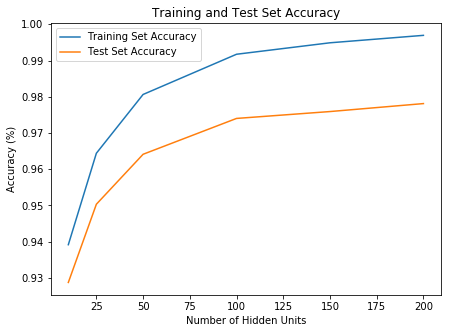

In [25]:
train_scores = [scores[i][0] for i in range(len(scores))]
test_scores  = [scores[i][1] for i in range(len(scores))]

plt.figure(figsize=(7,5))
plt.plot(num_units, train_scores, label='Training Set Accuracy')
plt.plot(num_units, test_scores, label='Test Set Accuracy')
plt.title("Training and Test Set Accuracy")
plt.xlabel("Number of Hidden Units")
plt.ylabel("Accuracy (%)")
plt.legend()

We can see that increasing the number of hidden units past 100 does not greatly enahance the accuracy of the model.  Additionally, increasing the number of hidden units increases the training time. Both these points dictates that we should look for new methods instead of blindly increaseing the number of hidden units of our model.

Instead of increasing the number of hidden units to improve performance we can look to use more sophisticated models like <a href="https://en.wikipedia.org/wiki/Convolutional_neural_network">convolutional neural networks</a>, but that will have to wait for another time!

## Conclusion <a class="anchor" id="fifth-bullet"></a>
------------
In this post we looked at using the Keras library to develop a multilayer perceptron model for image recognition and developed model that was able to get $97.5\%$ accuracy on the MNIST data set.  In the future I'll be adding more to this post so check back at a later time!